# Climate Analysis - Honolulu, Hawaii
----

Duration: 15 days (8/08~8/23)


In [85]:
# dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

### Reflect Tables into SQLAlchemy ORM

In [86]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Climate Analysis
----


### Precipitation Observations

In [41]:
# Observation of columns in Measurement table
for col in inspector.get_columns('Measurement'):
    print(col)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [114]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
#      Calculation of 'max_date':latest date of Measurement table 
#      and 'min_date': date of 'last 12 months' (1 year) from max_date    
max_date = session.query(func.max(Measurement.date))
max_date = pd.to_datetime(max_date[0]).date
min_date = pd.to_datetime((max_date-pd.DateOffset(365))).date

# Converting data type to string for filter of query
max_date = str(max_date[0]) 
min_date = str(min_date[0])

# Query of precipitation data of 1 year prior to last date in dataset
prec_data = session.query(Measurement.date, Measurement.prcp) \
                    .filter(func.date(Measurement.date) <= max_date) \
                    .filter(func.date(Measurement.date) >= min_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_data_df = pd.DataFrame(prec_data)

prec_data_df = prec_data_df.set_index(prec_data_df.columns[0])

# Sort the dataframe by date
prec_data_df = prec_data_df.sort_values('date')
prec_data_df

prcp
date            
2016-08-23  0.00
2016-08-23   NaN
2016-08-23  1.79
2016-08-23  0.05
2016-08-23  0.15
2016-08-23  0.70
2016-08-23  0.02
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.45
2016-08-24  1.22
2016-08-24  2.15
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.00
2016-08-25  0.11
2016-08-25  0.08
2016-08-26  0.03
2016-08-26  0.01
2016-08-26  0.00
2016-08-26  0.04
2016-08-26  0.02
2016-08-26  0.00
2016-08-27  0.18
2016-08-27  0.12
2016-08-27  0.00
...          ...
2017-08-16  0.42
2017-08-16  0.12
2017-08-16  0.07
2017-08-16  0.00
2017-08-17  0.13
2017-08-17  0.01
2017-08-17  0.00
2017-08-17  0.05
2017-08-18   NaN
2017-08-18  0.06
2017-08-18  0.00
2017-08-18  0.00
2017-08-19  0.00
2017-08-19  0.09
2017-08-19   NaN
2017-08-19  0.00
2017-08-20  0.00
2017-08-20  0.01
2017-08-20   NaN
2017-08-21  0.56
2017-08-21  0.02
2017-08-21  0.00
2017-08-21   NaN
2017-08-22  0.00
2017-08-22  0.50
2017-08-22  0.00
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45

[2230 rows x 1 columns]

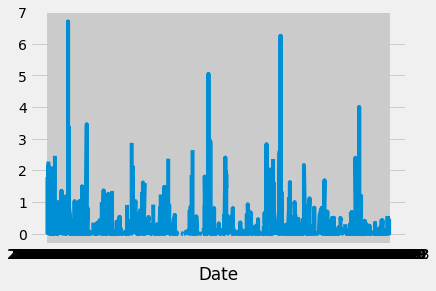

In [96]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(prec_data_df)
plt.xlabel("Date")
plt.show()
#![precipitation](Images/precipitation.png)

In [50]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_data_df.describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

![describe](Images/describe.png)

----
### Station Observations

In [92]:
# Observation of columns in Station table
for col1 in inspector.get_columns('Station'):
    print(col1)

# Design a query to show how many stations are available in this dataset?
station_data = session.query(Station.station).count()

print(f"A total of {station_data} stations exist.")

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
A total of 9 stations exist.


In [102]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_data_activity = session.query(Measurement.station, func.count(Measurement.station)) \
                                .group_by("station") \
                                .order_by(desc(func.count(Measurement.station)))

# Output list of stations and counts
for station in station_data_activity:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [109]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_data_tob = session.query(Measurement.station, func.min(Measurement.tobs), \
                                 func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
                                 .group_by("station") \
                                 .filter(Measurement.station == 'USC00519281')

# Output station USC00519281's lowest/highest/average temp 
for station in station_data_tob:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [231]:
# Choose the station with the highest number of temperature observations.
station_data_temps = session.query(Measurement.station, func.count(Measurement.tobs)) \
                                .group_by("station") \
                                .order_by(desc(func.count(Measurement.tobs)))

# Output station with highest number of temp observations in descending order
for station in station_data_temps:
    print(station)

# Query the last 12 months of temperature observation data for this station 
# and plot the results as a histogram
station_data_mostTemps_12mo = session.query(Measurement.tobs) \
                                    .filter(Measurement.station == 'USC00519281') \
                                    .filter(Measurement.date <= max_date) \
                                    .filter(Measurement.date >= min_date)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


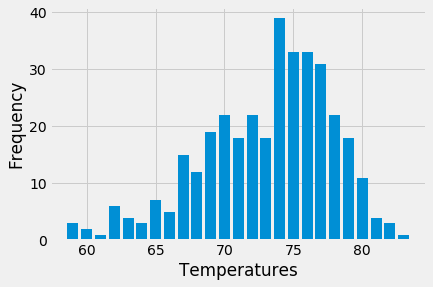

In [232]:
# Plot histogram
x_axis = np.sort(station_data_mostTemps_12mo_df.unique())
y_axis = station_data_mostTemps_12mo_df.value_counts().sort_index()
plt.bar(x_axis, y_axis)
plt.xlabel("Temperatures")
plt.ylabel("Frequency")
plt.show()

![precipitation](Images/station-histogram.png)

In [228]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [233]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# TRIP DATES: (8/08~8/23)
print(calc_temps('2017-08-08', '2017-08-23'))

[(70.0, 78.63492063492063, 85.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


trip_x_axis = np.sort(station_data_mostTemps_12mo_df.unique())
trip_y_axis = 

x_axis = 
y_axis = station_data_mostTemps_12mo_df.value_counts().sort_index()

plt.bar(trip_x_axis, trip_y_axis)
plt.errorbar()
plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
